In [3]:
!pip install git+https://github.com/facebookresearch/segment-anything.git


  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-4hmpdd0s
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-4hmpdd0s
  Resolved https://github.com/facebookresearch/segment-anything.git to commit 6fdee8f2727f4506cfbbe553e23b895e27956588
  Preparing metadata (setup.py) ... done


In [4]:
from segment_anything import SamAutomaticMaskGenerator, sam_model_registry
sam = sam_model_registry["vit_b"](checkpoint="/content/drive/MyDrive/Colab Notebooks/model.pth")
mask_generator = SamAutomaticMaskGenerator(sam)



In [5]:
import cv2
import numpy as np
# Read the image using OpenCV
image = cv2.imread("/content/drive/MyDrive/Colab Notebooks/1 (1).jpg")

# Convert BGR to RGB (if needed)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


In [6]:
masks = mask_generator.generate(image_rgb)

In [10]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import cv2
def show_anns(anns):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)

    img = np.ones((sorted_anns[0]['segmentation'].shape[0], sorted_anns[0]['segmentation'].shape[1], 4))
    img[:,:,3] = 0
    for ann in sorted_anns:
        m = ann['segmentation']
        color_mask = np.concatenate([np.random.random(3), [0.35]])
        img[m] = color_mask
    ax.imshow(img)

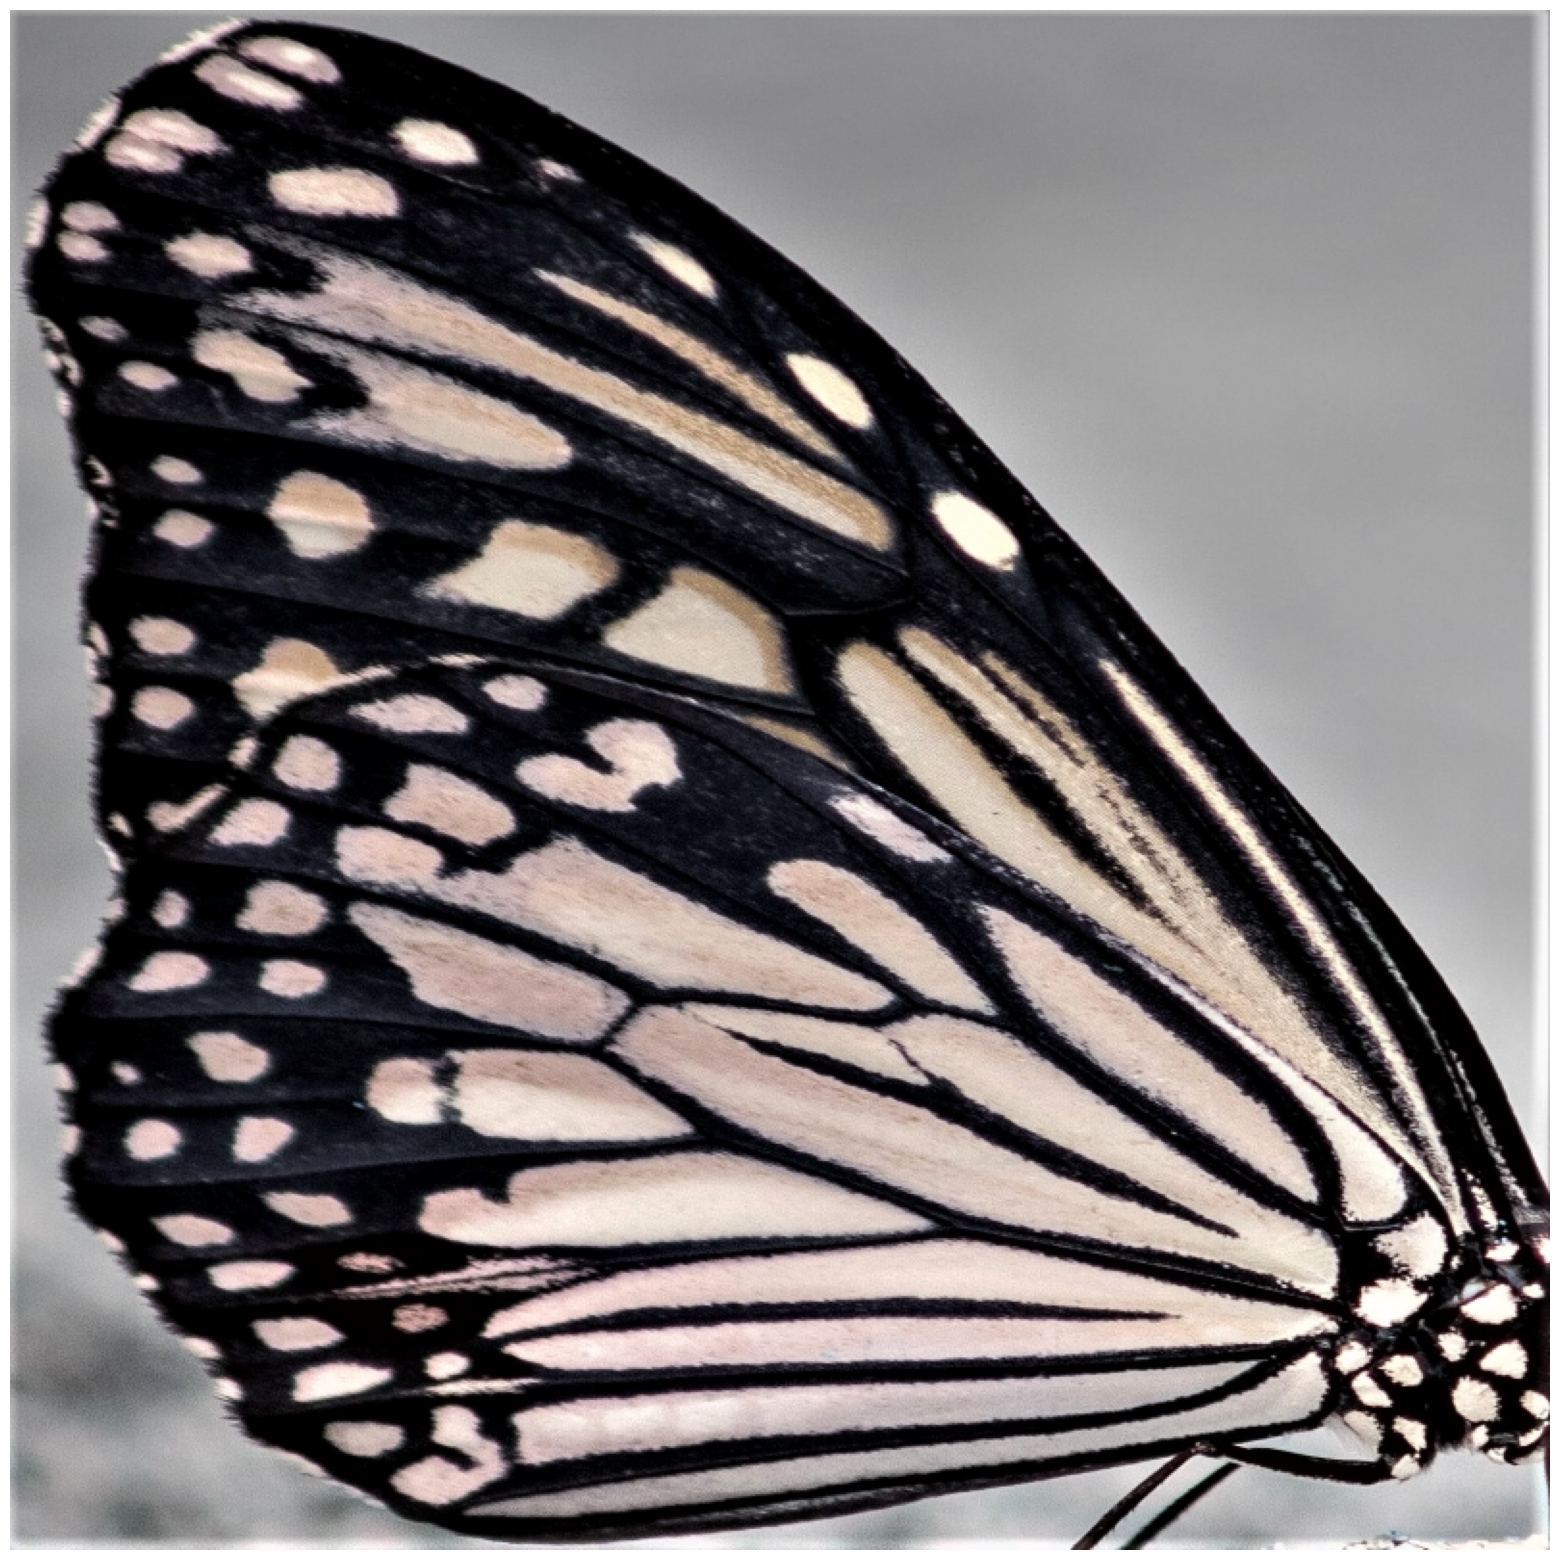

In [13]:
plt.figure(figsize=(20,20))
plt.imshow(image)
plt.axis('off')
plt.show()

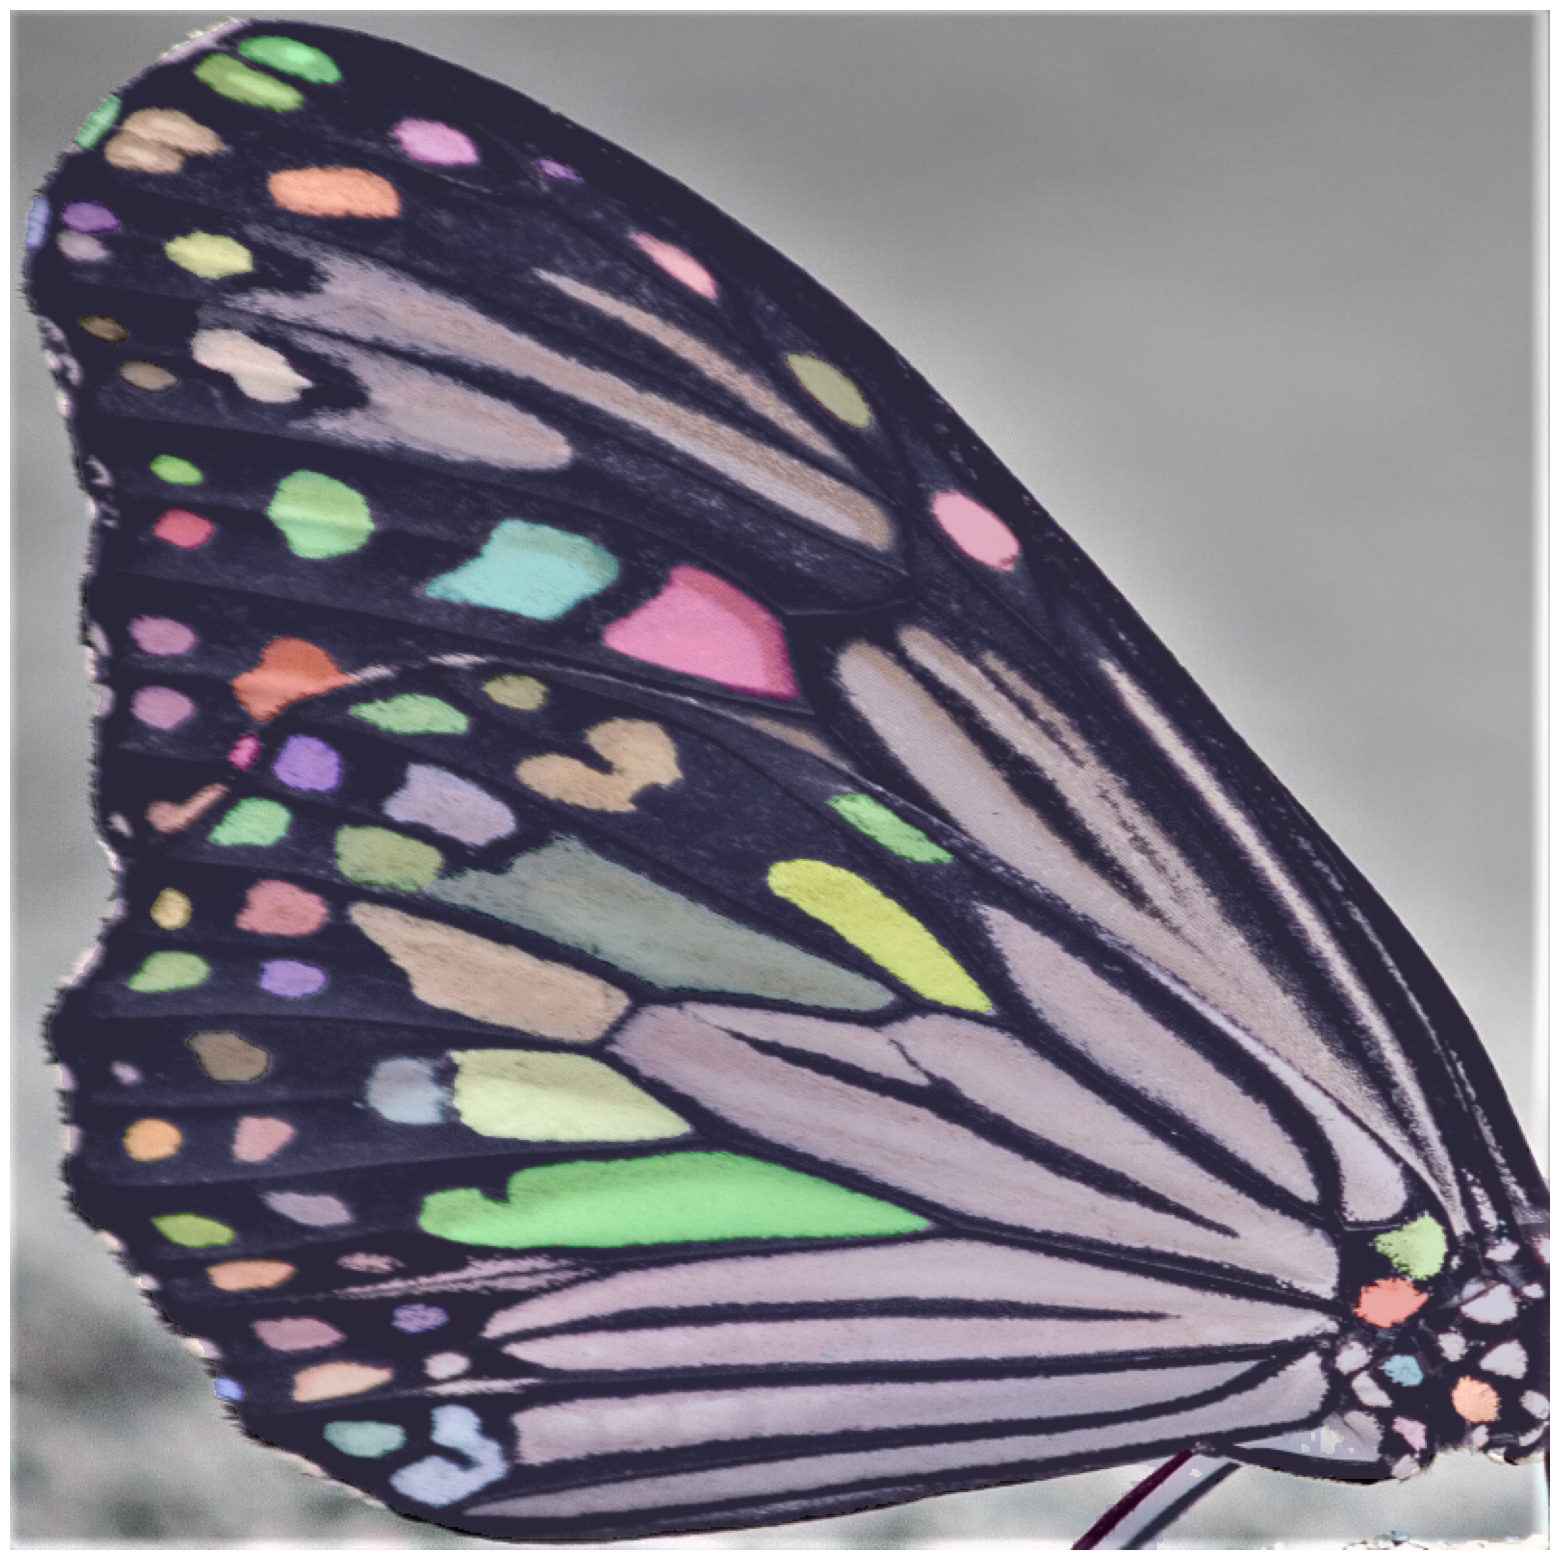

In [15]:
plt.figure(figsize=(20,20))
plt.imshow(image)
show_anns(masks)
plt.axis('off')
plt.show()
